In [4]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
#from numpy.random import rand
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn
from tqdm import tqdm,tqdm_gui

Υπολογίστε τη μάζα και το κεντρο μάζας του παρακάτω επίπεδου ςσχήματος με τη μέθοδο της απόρριψης Monte Carlo. Θεωρείστε μοναδιαία σταθερή επιφανειακή πυκνότητα.

* Η συνολική μάζα είναι $M=\int dm =\int  \rho  dV =\int \rho dxdy$
* Μπορούμε να υπολογίσουμε ένα ολοκλήρωμα μέσω της σχέσης: 
$$
\int f dV =  V<f> + V\sqrt{\frac{<f^2>-<f>^2}{N}} =\frac{V}{N}\sum_i ^N f(x_i) + 
\frac{V}{N}\sqrt{\sum_i ^N f^2(x_i)-\frac{1}{N}\big(\sum_i ^N f(x_i)\big)^2}
$$

$$
\int f x dV =  V<fx> + V\sqrt{\frac{<(fx)^2>-<fx>^2}{N}} =\frac{V}{N}\sum_i ^N xf(x_i) + 
\frac{V}{N}\sqrt{\sum_i ^N (xf)^2(x_i)-\frac{1}{N}\big(\sum_i ^N xf(x_i)\big)^2}
$$

In [58]:
rho = 1. #Πυκνότητα (Συνάρτηση κατανομής = σταθερή)
R=1. #Η ακτίνα του κυκλου
V=2.*2. #Ο όγκος (εμβαδο) του συνολικού χωρίου 2X2
N=1000000. #Αριθμός των σημείων
xx=[] #Δημιουργία λίστας όπου θα αποθηκευτούν τα σημείαπου ανήκουν στο σώμα
yy=[]
m0=0. #Μηδενική ροπή, το ολοκλήρωμα ρ dxdy 
m1x=0. #Πρώτη ροπή, το ολοκλήρωμα ρx dx 
m1y=0. #Πρώτη ροπή, το ολοκλήρωμα ρy dy 
m2=0. #Το ολοκλήρωμα ρ^2 dxdy 
m2x=0. #Δεύτερη ροπή, το ολοκλήρωμα (ρx)^2 dx 
m2y=0. #Δεύτερη ροπή, το ολοκλήρωμα (ρx)^2 dx 
for i in np.arange(N): #Για κάθε σημείο
    x=2.*rnd.rand() #Τυχαίες Συντεταγμένες του σημείου (x,y)
    y=2.*rnd.rand()
    if x**2+y**2>R**2: #Αν το σημείο βρίσκεται εκτός του κύκλου
        if y<2.-x:  #Αν το σημείο βρίσκεται κάτω από τη γραμμή y=2-x
            m0=m0+rho #Λύσε τα παραπάνω ολοκληρώματα = άθροιση
            m1x=m1x+rho*x
            m1y=m1y+rho*y
            m2=m2+rho**2
            m2x=m2x+(rho*x)**2
            m2y=m2y+(rho*y)**2
            xx.append(x) #αποθήκευσε τις τιμές (x,y)
            yy.append(y)

$$
x_{cm}=\frac{\int f(x)xdx}{\int f(x) dx} = \frac{\int \rho x dx}{\int \rho  dx}= \frac{\int \rho x dx}{M} =
\frac{\frac{V}{N}\sum \rho x_i}{M}
$$

In [47]:
M=m0*(V/N) #Μάζα του σώματος 
dM=(V/N)*np.sqrt(m2-m0**2/N) #Σφάλμα της μάζας
xc=m1x*(V/N)/M #Θέση x του κέντρου μάζας
dxc=(V/N)*np.sqrt(m2x-m1x**2/N) #σφάλμα της Θέσης x του κέντρου μάζας
yc=m1y*(V/N)/M  #Θέση y του κέντρου μάζας
dyc=(V/N)*np.sqrt(m2y-m1y**2/N) #σφάλμα της Θέσης y του κέντρου μάζας
print 'Συνολική Μάζα: %1.3f +- %0.4f'%(M,dM)
print 'Θέση Κέντρου Μάζας: (%1.3f +-%0.4f ,%1.3f +- %0.4f)'%(xc,dxc,yc,dyc)

Συνολική Μάζα: 1.213 +- 0.0018
Θέση Κέντρου Μάζας: (0.822 +-0.0019 ,0.824 +- 0.0019)


<Container object of 3 artists>

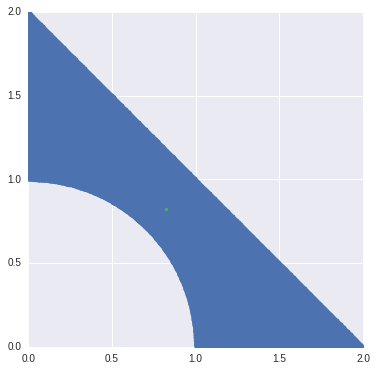

In [45]:
fig= plt.figure(figsize=(6,6))
plt.plot(xx,yy,'.')
plt.errorbar(xc,yc,xerr=dxc,yerr=dyc,fmt='.')

Χρθςιμοποιώντας τη μέθοδο Monte Carlo, υπολογίστε τη ροπή αδράνειας μονοδιάστατης ράβδου μήκους $L=1\, m$ και γραμμικής πυκνότητας $\sigma=r\, kg/m$, όπου $r$ η απόσταση από το ένα άκρο της ράβδου. Η ροπή αδράνειας να υπολογιστεί ως προς άξονες που περνούν από το κέντρο και τα δύο άκρα της ράβδου.

$$
I=\int x^2 dm =\int x^2 \rho dx =\int x^3 dx =\sum x_i ^3
$$

In [59]:
L=1. #Μήκος Ράβδου
V=1. #Ο όγκος (εμβαδο) του συνολικού χωρίου 1
N=1000000. #Αριθμός των σημείων
m0=0. #Μηδενική ροπή, το ολοκλήρωμα ρ(x) dx
m1x=0. #Πρώτη ροπή, το ολοκλήρωμα ρ(x)x dx 
m2=0. #Το ολοκλήρωμα ρ(x)^2 dxdy 
m2x=0. #Δεύτερη ροπή, το ολοκλήρωμα (ρ(x)x)^2 dx 
I=0  #Το ολοκλήρωμα x^2 ρ(x) dx 
I2=0 #Το ολοκλήρωμα (x^2 ρ(x))^2 dx 
for i in np.arange(N):
    x=rnd.rand()
    m0=m0+x
    m1x=m1x+x*x
    m2=m2+x**2
    m2x=m2x+(x*x)**2
    I=I+x*x**2
    I2=I2+(x*x**2)**2

In [60]:
M=m0*(V/N) #Μάζα της ράβδου
dM=(V/N)*np.sqrt(m2-m0**2/N) #Σφάλμα της μάζας της ράβδου
xc=m1x*(V/N)/M #Θέση του κέντρου μάζας
dxc=(V/N)*np.sqrt(m2x-m1x**2/N) #Σφάλμα της Θέσης του κέντρου μάζας
I0=I*(V/N) #Ροπή Αδράνειας (ως προς την αρχή των αξόνων)
dI0=(V/N)*np.sqrt(I2-I**2/N) #Σφάλμα της ροπής Αδράνειας (ως προς την αρχή των αξόνων)
print 'Συνολική Μάζα: %1.3f +- %0.4f'%(M,dM)
print 'Θέση Κέντρου Μάζας: %1.3f +-%0.4f'%(xc,dxc)
print 'Ροπή αδράνειας: %1.3f +- %1.5f'%(I0,dI0)

Συνολική Μάζα: 0.500 +- 0.0003
Θέση Κέντρου Μάζας: 0.666 +-0.0003
Ροπή αδράνειας: 0.250 +- 0.00028


In [57]:
Icm=I0-M*xc**2 #Εύρεση της Ροπής Αδράνειας (ως προς το κέντρο μάζας)
Icm

0.027773111572376497

In [169]:
Imid=Icm+M*(L/2-xc)**2 #Εύρεση της Ροπής Αδράνειας (ως προς το μέσω της ράβδου)
Imid

0.04156219507039909

In [170]:
Iend=Icm+M*(L-xc)**2 #Εύρεση της Ροπής Αδράνειας (ως προς το τέλος της ράβδου)
Iend

0.08339169462065507